In [1]:
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python

In [59]:
# Leemos la data de desarrollo de modeolos
desarrll = pd.read_csv("AdquisicionAhorro.csv") 
# Leer el dataset en un dataframe usando pandas

In [60]:
desarrll.head(10)

,coddoc,edad,estciv,educacion,mora,balance,vivienda,prestamo,dia,duracion,campana,pdias,previo,Adq_Ahorro
0,CODDOC0001,30,married,primaria,no,1787,no,no,19,79,1,-1,0,0
1,CODDOC0002,33,married,secundaria,no,4789,si,si,11,220,1,339,4,0
2,CODDOC0003,35,single,terciario,no,1350,si,no,16,185,1,330,1,0
3,CODDOC0004,30,married,terciario,no,1476,si,si,3,199,4,-1,0,0
4,CODDOC0006,35,single,terciario,no,747,no,no,23,141,2,176,3,0
5,CODDOC0009,41,married,terciario,no,221,si,no,14,57,2,-1,0,0
6,CODDOC0010,43,married,primaria,no,-88,si,si,17,313,1,147,2,0
7,CODDOC0011,39,married,secundaria,no,9374,si,no,20,273,1,-1,0,0
8,CODDOC0015,31,married,secundaria,no,360,si,si,29,89,1,241,1,0
9,CODDOC0019,25,single,primaria,no,-221,si,no,23,250,1,-1,0,0


In [61]:
# Dimension
desarrll.shape
# Son 614 obs con 13 columnas

(2240, 14)

In [62]:
#Leer los primeros registros.
# Podemos ver la estructura de los datos, es el str de Python
desarrll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
coddoc        2240 non-null object
edad          2240 non-null int64
estciv        2240 non-null object
educacion     2240 non-null object
mora          2240 non-null object
balance       2240 non-null int64
vivienda      2240 non-null object
prestamo      2240 non-null object
dia           2240 non-null int64
duracion      2240 non-null int64
campana       2240 non-null int64
pdias         2240 non-null int64
previo        2240 non-null int64
Adq_Ahorro    2240 non-null int64
dtypes: int64(8), object(6)
memory usage: 245.1+ KB


In [63]:
desarrll.describe() #Resumen de la información cuantitativa

,edad,balance,dia,duracion,campana,pdias,previo,Adq_Ahorro
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,41.228125,1424.717857,15.910714,257.935714,2.832143,37.482589,0.519643,0.115179
std,10.507201,3118.413754,8.241664,248.570889,3.205127,94.996686,1.549991,0.319309
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,63.000000,9.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.500000,437.000000,16.000000,182.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1503.750000,21.000000,319.250000,3.000000,-1.000000,0.000000,0.000000
max,86.000000,71188.000000,31.000000,3025.000000,50.000000,808.000000,23.000000,1.000000


In [64]:
# Cambiando data
# desarrll['estciv'].unique()
# desarrll['estciv'].replace([0, 1, 2],['married', 'single', 'divorced'],inplace=True)
desarrll['estciv'].astype('category')

0        married
1        married
2         single
3        married
4         single
5        married
6        married
7        married
8        married
9         single
10      divorced
11      divorced
12       married
13       married
14      divorced
15       married
16        single
17      divorced
18      divorced
19        single
20       married
21        single
22        single
23       married
24       married
25        single
26       married
27        single
28       married
29       married
          ...   
2210    divorced
2211      single
2212     married
2213     married
2214      single
2215     married
2216      single
2217     married
2218     married
2219     married
2220    divorced
2221      single
2222     married
2223      single
2224      single
2225      single
2226      single
2227      single
2228     married
2229     married
2230     married
2231     married
2232     married
2233    divorced
2234     married
2235     married
2236     married
2237     marri

In [65]:
# One-Hot Encoding in Python
# Using dummies values approach:
desarrll = pd.get_dummies(desarrll, columns=["estciv"], prefix=["estciv_is"] )
desarrll = pd.get_dummies(desarrll, columns=["educacion"], prefix=["educacion_is"] ) 
desarrll = pd.get_dummies(desarrll, columns=["mora"], prefix=["mora_is"] ) 
desarrll = pd.get_dummies(desarrll, columns=["vivienda"], prefix=["vivienda_is"] ) 
desarrll = pd.get_dummies(desarrll, columns=["prestamo"], prefix=["prestamo_is"] ) 

In [66]:
desarrll = desarrll.drop('coddoc', axis=1)
desarrll.head(10)

,edad,balance,dia,duracion,campana,pdias,previo,Adq_Ahorro,estciv_is_divorced,estciv_is_married,...,educacion_is_desconocido,educacion_is_primaria,educacion_is_secundaria,educacion_is_terciario,mora_is_no,mora_is_si,vivienda_is_no,vivienda_is_si,prestamo_is_no,prestamo_is_si
0,30,1787,19,79,1,-1,0,0,0,1,...,0,1,0,0,1,0,1,0,1,0
1,33,4789,11,220,1,339,4,0,0,1,...,0,0,1,0,1,0,0,1,0,1
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,1,1,0,0,1,1,0
3,30,1476,3,199,4,-1,0,0,0,1,...,0,0,0,1,1,0,0,1,0,1
4,35,747,23,141,2,176,3,0,0,0,...,0,0,0,1,1,0,1,0,1,0
5,41,221,14,57,2,-1,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
6,43,-88,17,313,1,147,2,0,0,1,...,0,1,0,0,1,0,0,1,0,1
7,39,9374,20,273,1,-1,0,0,0,1,...,0,0,1,0,1,0,0,1,1,0
8,31,360,29,89,1,241,1,0,0,1,...,0,0,1,0,1,0,0,1,0,1
9,25,-221,23,250,1,-1,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0


In [67]:
# Análisis Univariado de los atributos del data set
%matplotlib inline
import matplotlib.pyplot as plt

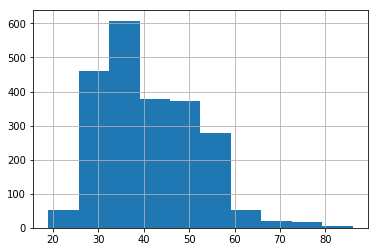

In [68]:
desarrll['edad'].hist()

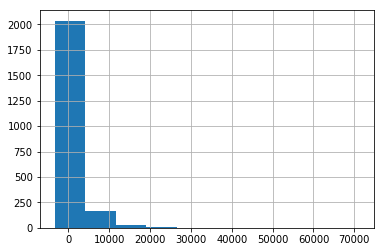

In [69]:
desarrll['balance'].hist()

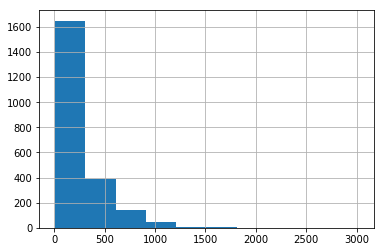

In [70]:
desarrll['duracion'].hist()

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

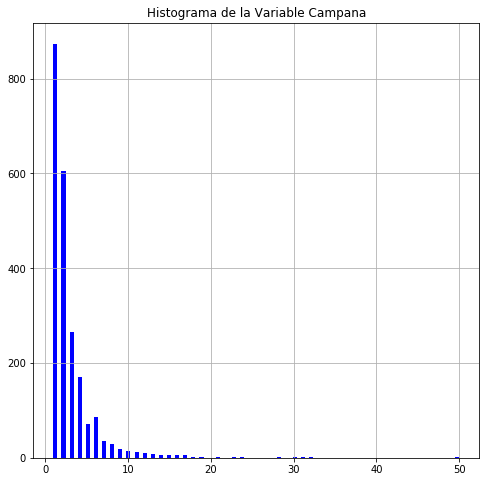

In [72]:
plt.title('Histograma de la Variable Campana')
desarrll['campana'].hist(figsize=(8,8),color="blue",bins=100)

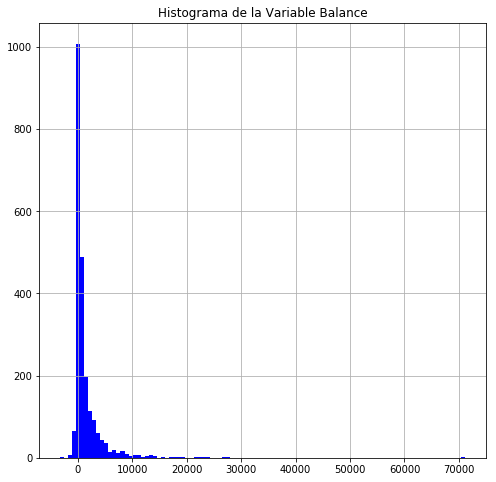

In [73]:
plt.title('Histograma de la Variable Balance')
desarrll['balance'].hist(figsize=(8,8),color="blue",bins=100)

In [74]:
# Gráfico de Cajas
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

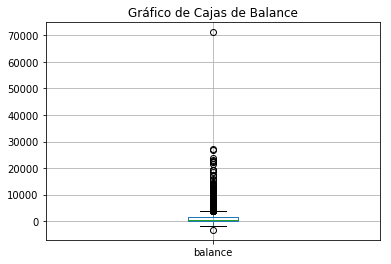

In [75]:
plt.title('Gráfico de Cajas de Balance')
#train.boxplot(column='LoanAmount',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)
desarrll.boxplot(column='balance')

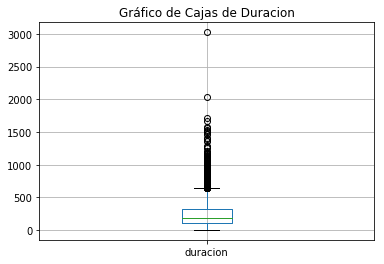

In [76]:
plt.title('Gráfico de Cajas de Duracion')
desarrll.boxplot(column='duracion')

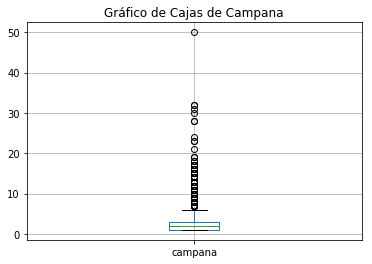

In [77]:
plt.title('Gráfico de Cajas de Campana')
desarrll.boxplot(column='campana')

In [78]:
# Creamos una funcion para poder visualizar los percentiles
def Cuantiles(lista):
    c = [0,1,5,10,20,30,40,50,60,70,80,90,92.5,95,97.5,99,99.5,100]
    matrix = pd.concat([pd.DataFrame(c),pd.DataFrame(np.percentile(lista.dropna(),c))],axis = 1)
    matrix.columns = ["Cuantil","Valor_Cuantil"]
    return(matrix)

In [79]:
# Analizamos las variables numericas
# Variable
Cuantiles(desarrll["balance"]).transpose()
# Nos hacemos la pregunta, podríamos acotar la variable?

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Cuantil,0.0,1.00,5.00,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.500,95.00,97.5,99.00,99.50,100.0
Valor_Cuantil,-3313.0,-799.82,-217.05,0.0,14.0,113.0,251.0,437.0,720.2,1148.0,1989.2,3872.1,4761.875,6145.95,9269.9,13700.08,19127.85,71188.0


In [80]:
# Tratamiento para la variable ApplicantIncome
cuantil_1 = np.percentile(desarrll["balance"],1)
cuantil_99 = np.percentile(desarrll["balance"],99.5)

# Reemplazamos el valor minimo y maximo
desarrll.loc[desarrll["balance"]<cuantil_1,"balance"] = cuantil_1
desarrll.loc[desarrll["balance"]>cuantil_99,"balance"] = cuantil_99

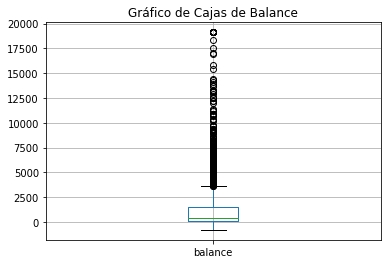

In [81]:
plt.title('Gráfico de Cajas de Balance')
desarrll.boxplot(column='balance')

In [82]:
Cuantiles(desarrll["balance"]).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Cuantil,0.00,1.0000,5.00,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.500,95.00,97.5,99.00,99.50000,100.00
Valor_Cuantil,-799.82,-785.0702,-217.05,0.0,14.0,113.0,251.0,437.0,720.2,1148.0,1989.2,3872.1,4761.875,6145.95,9269.9,13700.08,18975.58425,19127.85


In [83]:
# Analizamos las variables numericas
# Variable
Cuantiles(desarrll["duracion"]).transpose()
# Nos hacemos la pregunta, podríamos acotar la variable?

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Cuantil,0.0,1.0,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.500,95.00,97.500,99.00,99.500,100.0
Valor_Cuantil,4.0,10.0,30.0,56.0,87.8,118.0,148.0,182.0,222.0,277.0,371.2,574.0,657.225,754.05,968.075,1170.49,1402.905,3025.0


In [84]:
# Tratamiento para la variable ApplicantIncome
cuantil_1 = np.percentile(desarrll["duracion"],1)
cuantil_99 = np.percentile(desarrll["duracion"],99.5)

# Reemplazamos el valor minimo y maximo
desarrll.loc[desarrll["duracion"]<cuantil_1,"duracion"] = cuantil_1
desarrll.loc[desarrll["duracion"]>cuantil_99,"duracion"] = cuantil_99

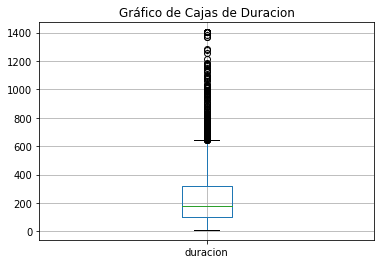

In [85]:
plt.title('Gráfico de Cajas de Duracion')
desarrll.boxplot(column='duracion')

In [86]:
# Analizamos las variables numericas
# Variable
Cuantiles(desarrll["duracion"]).transpose()
# Nos hacemos la pregunta, podríamos acotar la variable?

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Cuantil,0.0,1.0,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.500,95.00,97.500,99.00,99.500000,100.000
Valor_Cuantil,10.0,10.0,30.0,56.0,87.8,118.0,148.0,182.0,222.0,277.0,371.2,574.0,657.225,754.05,968.075,1170.49,1399.608525,1402.905


In [87]:
# Analizamos las variables numericas
# Variable
Cuantiles(desarrll["campana"]).transpose()
# Nos hacemos la pregunta, podríamos acotar la variable?

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Cuantil,0.0,1.0,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.5,95.0,97.5,99.0,99.5,100.0
Valor_Cuantil,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,6.0,6.0,8.0,11.0,16.0,19.0,50.0


In [88]:
cuantil_99 = np.percentile(desarrll["campana"],99.5)
desarrll.loc[desarrll["campana"]>cuantil_99,"campana"] = cuantil_99

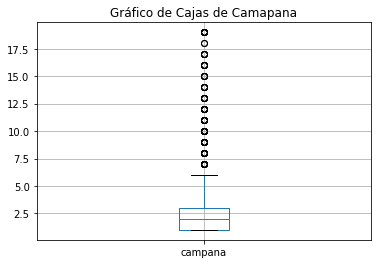

In [89]:
plt.title('Gráfico de Cajas de Camapana')
desarrll.boxplot(column='campana')

In [90]:
# Analizamos las variables numericas
# Variable
Cuantiles(desarrll["campana"]).transpose()
# Nos hacemos la pregunta, podríamos acotar la variable?

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Cuantil,0.0,1.0,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.5,95.0,97.5,99.0,99.5,100.0
Valor_Cuantil,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,6.0,6.0,8.0,11.0,16.0,19.0,19.0


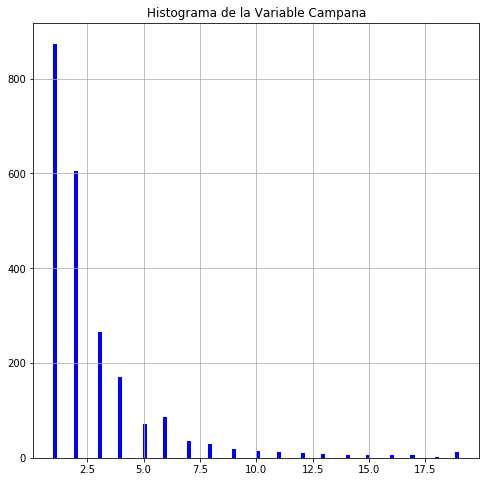

In [91]:
plt.title('Histograma de la Variable Campana')
desarrll['campana'].hist(figsize=(8,8),color="blue",bins=100)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(desarrll.drop('Adq_Ahorro', axis=1), 
                                                    desarrll['Adq_Ahorro'], 
                                                    test_size=0.30,
                                                    stratify=desarrll['Adq_Ahorro'],
                                                    random_state=100)

# Seleccion de variables



Filter Method
----

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

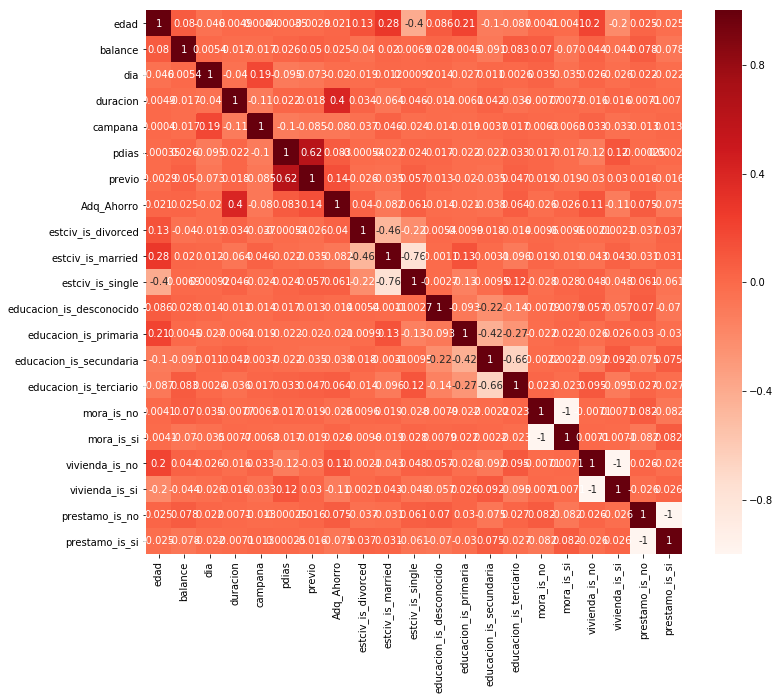

In [94]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = desarrll.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [95]:
#Correlation with output variable
cor_target = abs(cor["prestamo_is_si"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

prestamo_is_no    1.0
prestamo_is_si    1.0
Name: prestamo_is_si, dtype: float64

Embeded Method
-----

In [96]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [98]:
reg = LassoCV()
X = desarrll.drop('Adq_Ahorro', axis=1)
y = desarrll['Adq_Ahorro']
reg.fit(desarrll.drop('Adq_Ahorro', axis=1), desarrll['Adq_Ahorro'])
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.030748
Best score using built-in LassoCV: 0.177430


C:\DeveloperPrograms\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [99]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 5 variables and eliminated the other 15 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

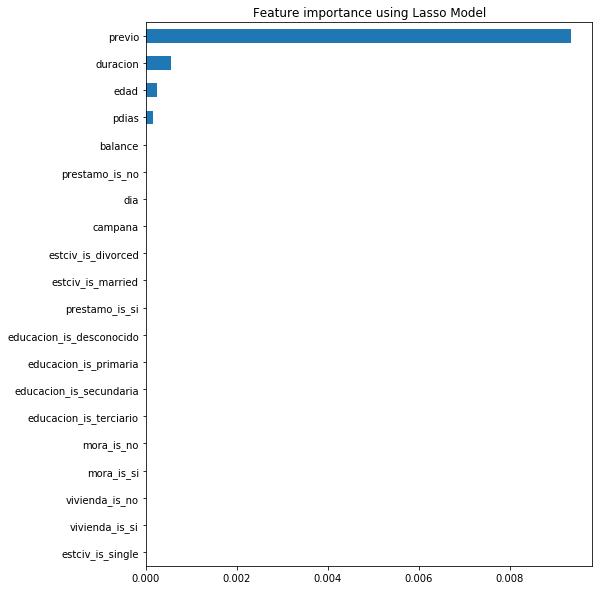

In [100]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")